In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
from itertools import combinations, groupby
from collections import Counter
from collections import OrderedDict
from IPython.display import display
from sklearn import datasets
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [3]:
#Import the files
aisles_df = pd.read_csv('aisles.csv')
products_df = pd.read_csv('products.csv')
orders_df = pd.read_csv('orders.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
departments_df = pd.read_csv('departments.csv')
order_products_train_df = pd.read_csv('order_products__train.csv')

In [4]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
prior = pd.read_csv('order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
orders = pd.read_csv('orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


# Data Wrangling

In [7]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

### Calculating Missing Value

In [8]:
orders_na = (orders.isnull().sum() / len(orders)) * 100
orders_na

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.027594
dtype: float64

### Drop Null Values

In [9]:
orders.dropna(inplace=True)

In [10]:
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

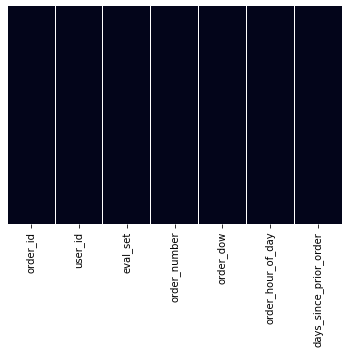

In [11]:
sns.heatmap(orders.isnull(),yticklabels=False,cbar=False)

In [12]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### Total Number of Rows in each Dataset

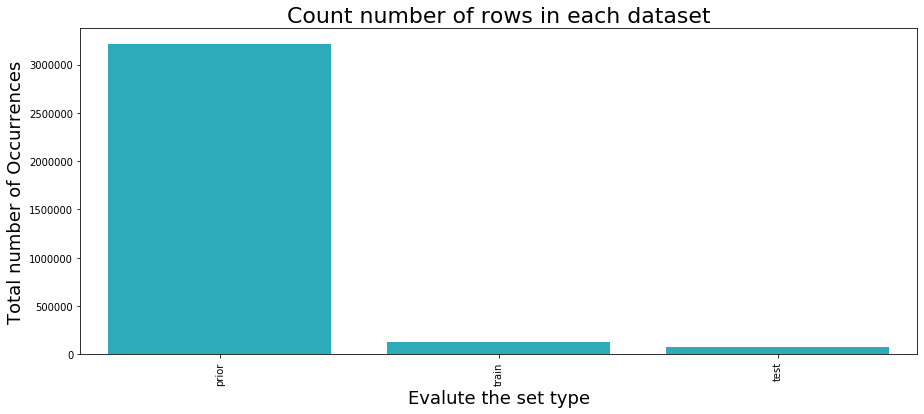

In [192]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(15,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=1, color=color[9])
plt.ylabel('Total number of Occurrences', fontsize=18)
plt.xlabel('Evalute the set type', fontsize=18)
plt.title('Count number of rows in each dataset', fontsize=22)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

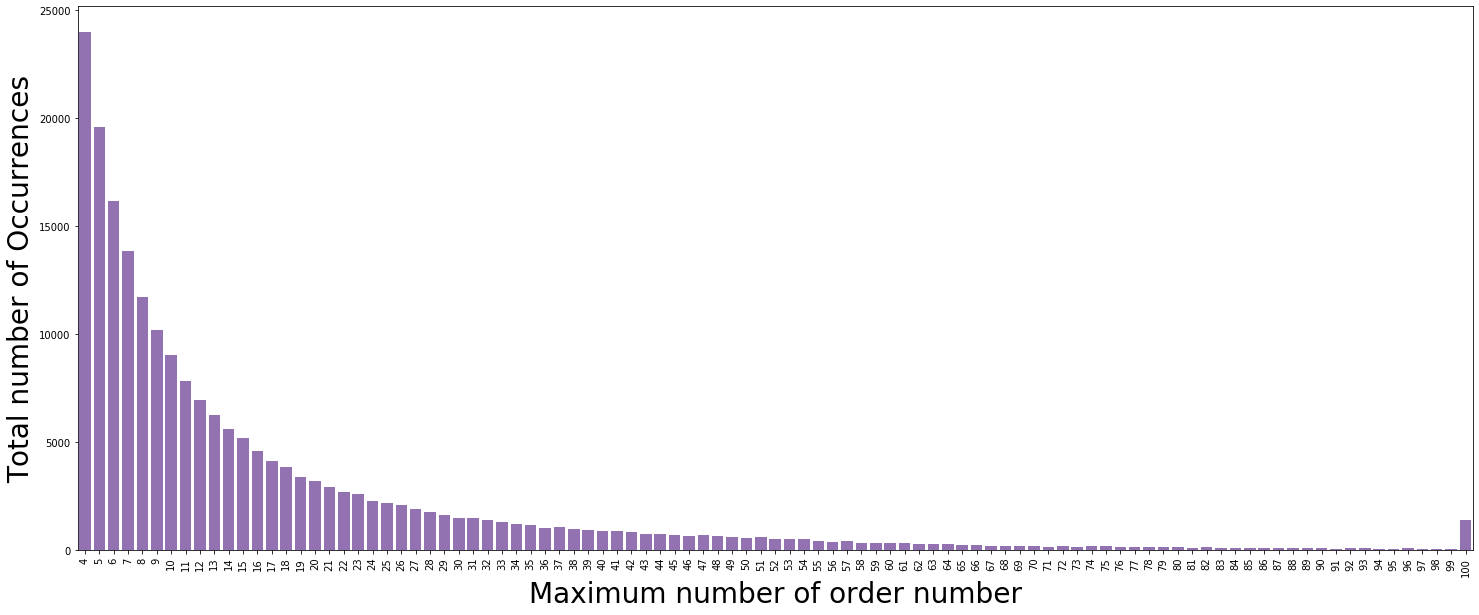

In [190]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(25,10))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=1, color=color[4])
plt.ylabel('Total number of Occurrences', fontsize=28)
plt.xlabel('Maximum number of order number', fontsize=28)
plt.xticks(rotation='vertical')
plt.show()

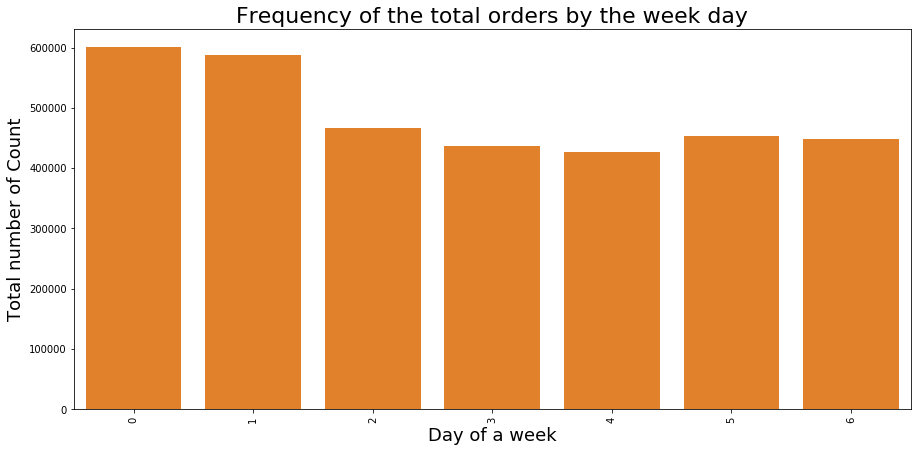

In [186]:
plt.figure(figsize=(15,7))
sns.countplot(x="order_dow", data=orders_df, color=color[1])
plt.ylabel('Total number of Count', fontsize=18)
plt.xlabel('Day of a week', fontsize=18)
plt.xticks(rotation='vertical')
plt.title("Frequency of the total orders by the week day", fontsize=22)
plt.show()

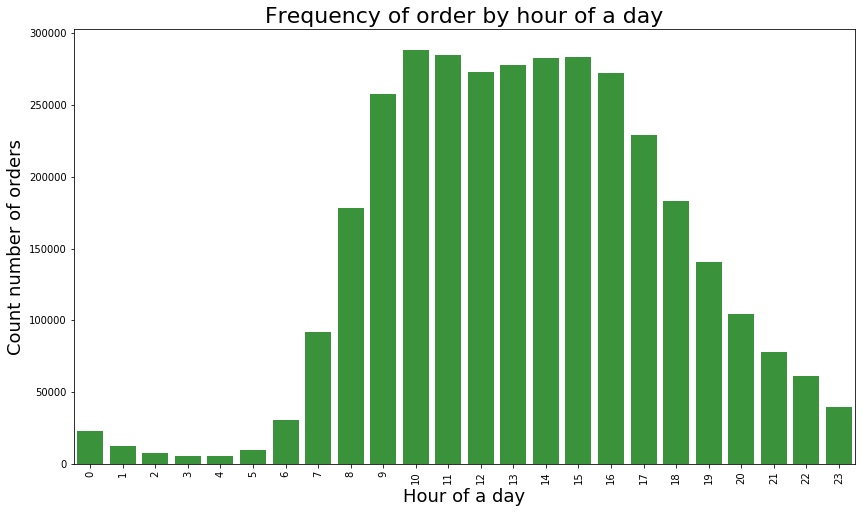

In [185]:
plt.figure(figsize=(14,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[2])
plt.ylabel('Count number of orders', fontsize=18)
plt.xlabel('Hour of a day', fontsize=18)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of a day", fontsize=22)
plt.show()

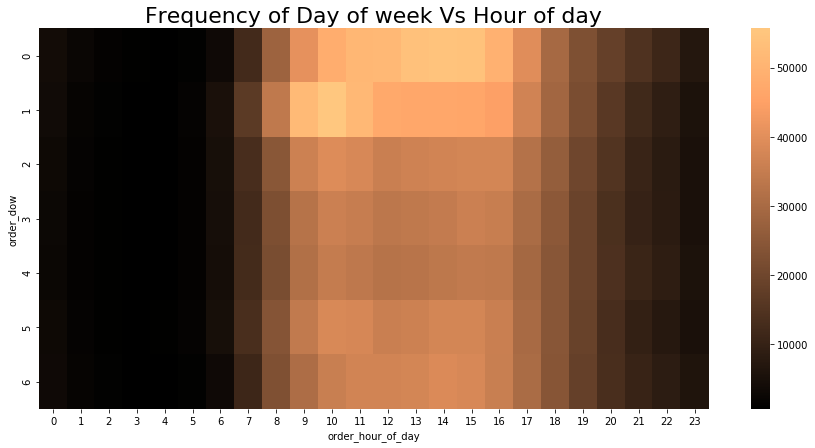

In [184]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(15,7))
sns.heatmap(grouped_df,cmap='copper')
plt.title("Frequency of Day of week Vs Hour of day",fontsize=22)
plt.show()

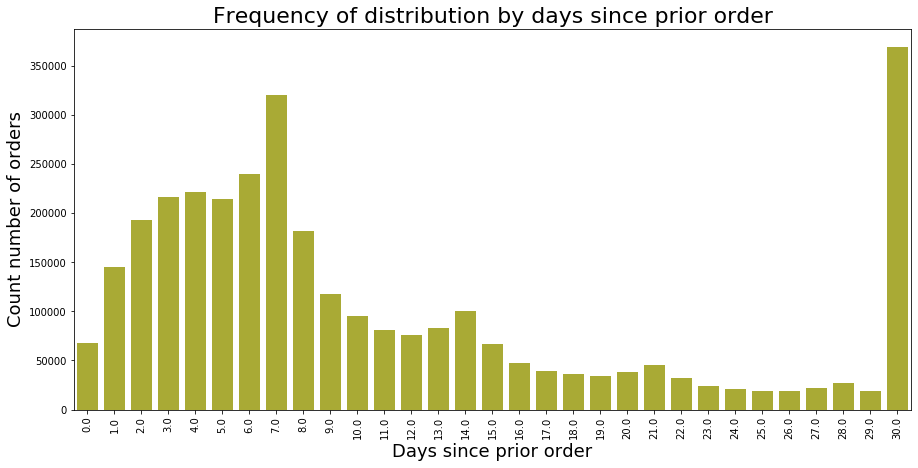

In [183]:
plt.figure(figsize=(15,7))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[8])
plt.ylabel('Count number of orders', fontsize=18)
plt.xlabel('Days since prior order', fontsize=18)
plt.xticks(rotation='vertical')
plt.title("Frequency of distribution by days since prior order", fontsize=22)
plt.show()

In [20]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5896974667922161

In [21]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629

In [22]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

In [23]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

1    0.93444
0    0.06556
Name: reordered, dtype: float64

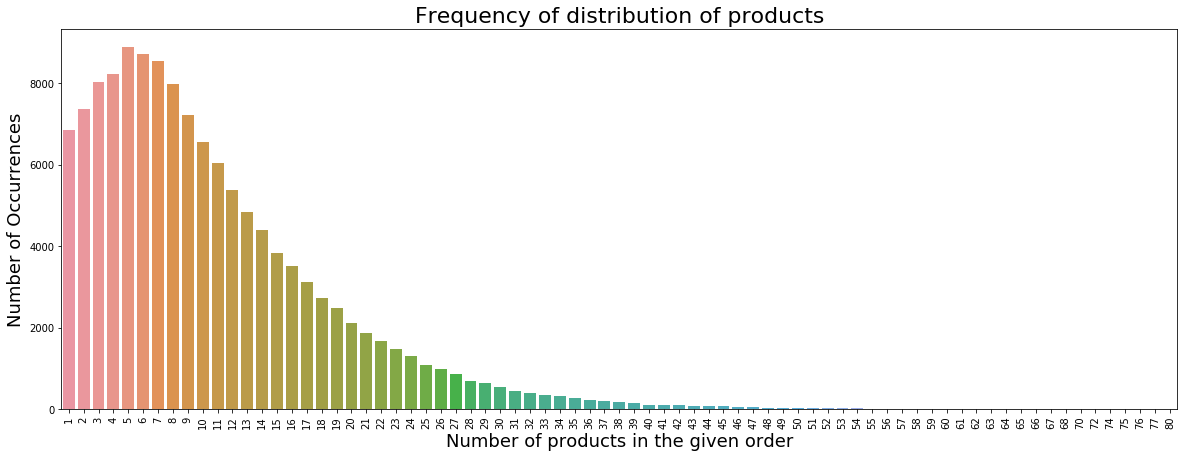

In [187]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(20,7))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=1)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.title("Frequency of distribution of products", fontsize=22)
plt.xlabel('Number of products in the given order', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [26]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [27]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [28]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [29]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


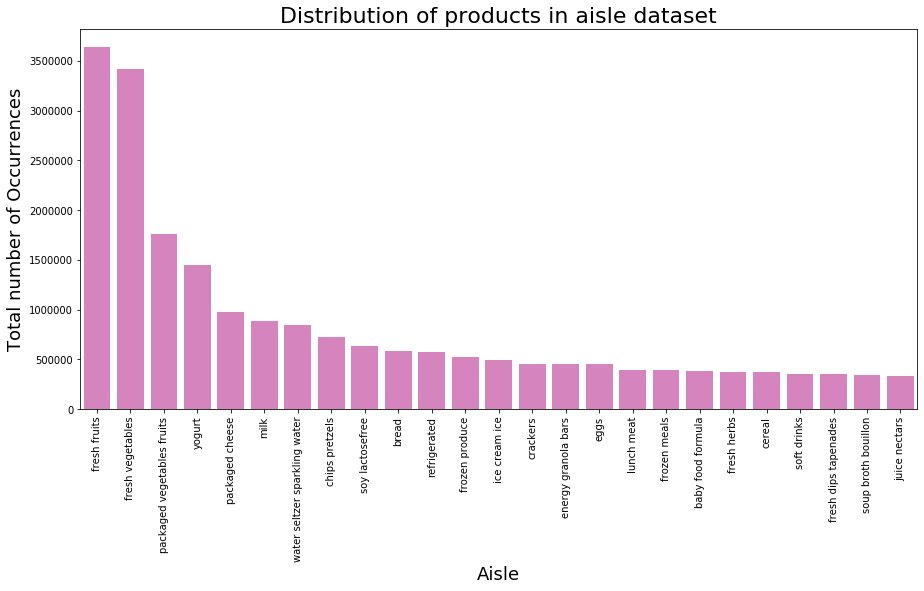

In [180]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(25)
plt.figure(figsize=(15,7))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=1, color=color[6])
plt.title("Distribution of products in aisle dataset", fontsize=22)
plt.ylabel('Total number of Occurrences', fontsize=18)
plt.xlabel('Aisle', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

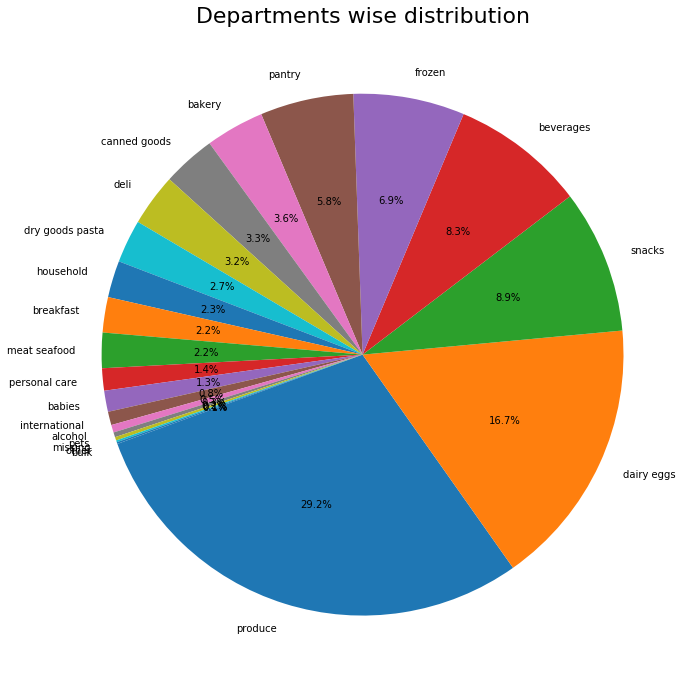

In [177]:
plt.figure(figsize=(12,12))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%2.1f%%', startangle=200)
plt.title("Departments wise distribution", fontsize=22)
plt.show()

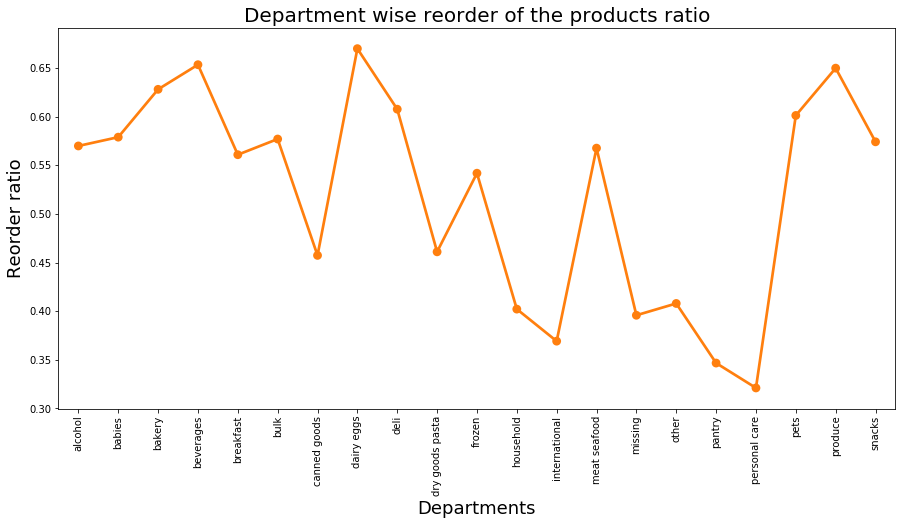

In [175]:
grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(15,7))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=1, color=color[1])
plt.ylabel('Reorder ratio', fontsize=18)
plt.xlabel('Departments', fontsize=18)
plt.title("Department wise reorder of the products ratio", fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

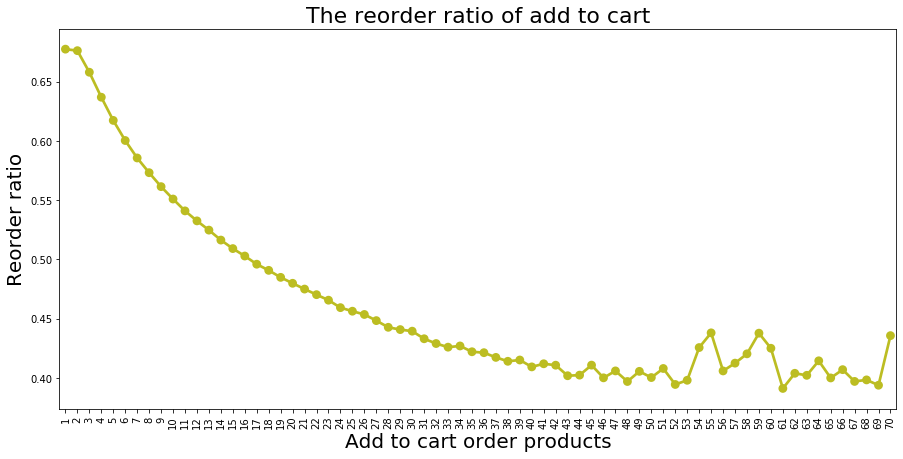

In [172]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(15,7))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=1, color=color[8])
plt.ylabel('Reorder ratio', fontsize=20)
plt.xlabel('Add to cart order products', fontsize=20)
plt.title("The reorder ratio of add to cart", fontsize=22)
plt.xticks(rotation='vertical')
plt.show()

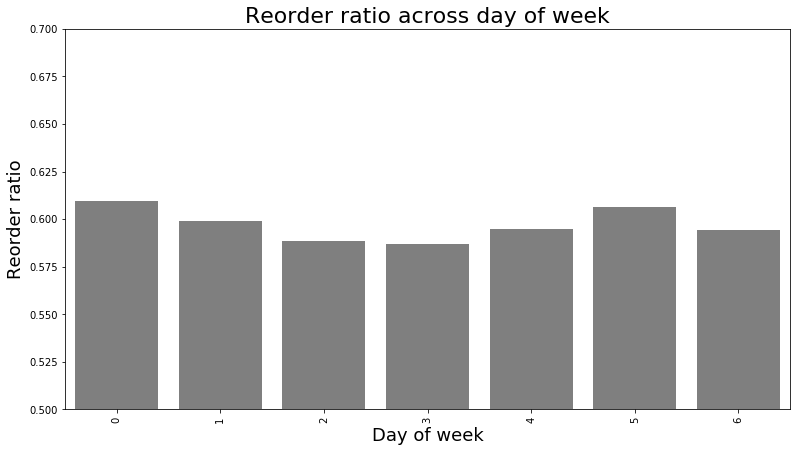

In [170]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(13,7))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=1, color=color[7])
plt.ylabel('Reorder ratio', fontsize=18)
plt.xlabel('Day of week', fontsize=18)
plt.title("Reorder ratio across day of week", fontsize=22)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

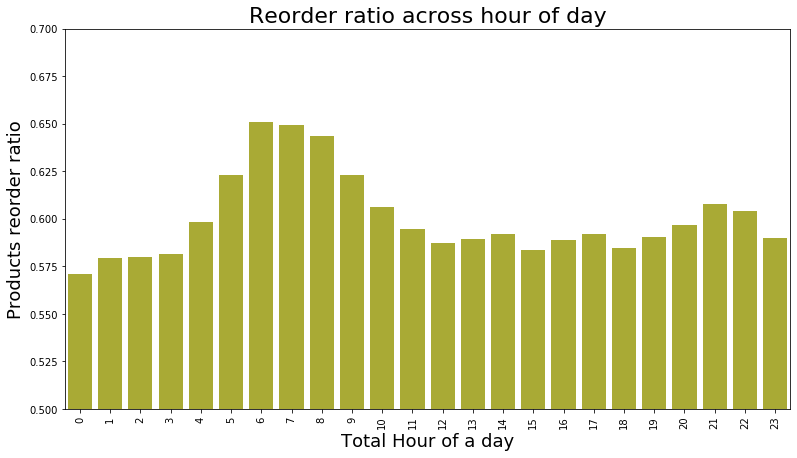

In [161]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(13,7))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=1, color=color[8])
plt.ylabel('Products reorder ratio', fontsize=18)
plt.xlabel('Total Hour of a day', fontsize=18)
plt.title("Reorder ratio across hour of day", fontsize=22)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

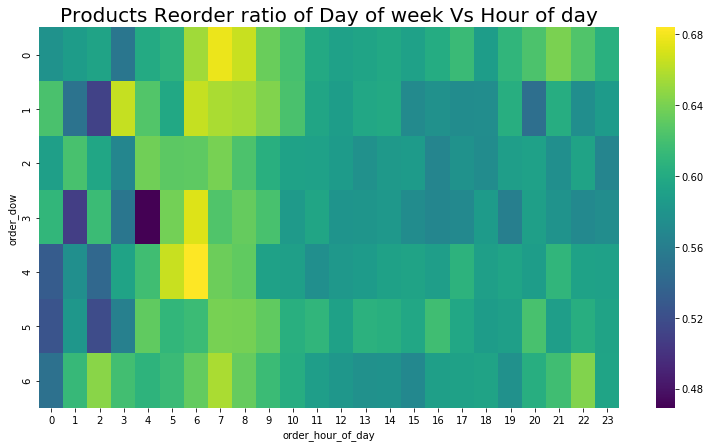

In [164]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(13,7))
sns.heatmap(grouped_df,cmap='viridis')
plt.title("Products Reorder ratio of Day of week Vs Hour of day",fontsize=20)
plt.show()

# Clustering Part

In [37]:
##Due to the number of rows I have to reduce the set of prior data
prior = prior[0:300000]

In [38]:
order_prior = pd.merge(prior,orders,on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
207459,23391,13198,1,1,7,prior,17,0,10,28.0
207460,23391,42803,2,1,7,prior,17,0,10,28.0
207461,23391,8277,3,1,7,prior,17,0,10,28.0
207462,23391,37602,4,1,7,prior,17,0,10,28.0
207463,23391,40852,5,1,7,prior,17,0,10,28.0


In [39]:
products = pd.read_csv('products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [40]:
aisles = pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [41]:
print(aisles.shape)

(134, 2)


In [42]:
_mt = pd.merge(prior,products, on = ['product_id','product_id'])
_mt = pd.merge(_mt,orders,on=['order_id','order_id'])
mt = pd.merge(_mt,aisles,on=['aisle_id','aisle_id'])
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs
5,537,33120,2,1,Organic Egg Whites,86,16,180135,prior,15,2,8,3.0,eggs
6,582,33120,7,1,Organic Egg Whites,86,16,193223,prior,6,2,19,10.0,eggs
7,608,33120,5,1,Organic Egg Whites,86,16,91030,prior,11,3,21,12.0,eggs
8,623,33120,1,1,Organic Egg Whites,86,16,37804,prior,63,3,12,3.0,eggs
9,689,33120,4,1,Organic Egg Whites,86,16,108932,prior,16,1,13,3.0,eggs


In [43]:
mt['product_name'].value_counts()[0:10]

Banana                    4166
Bag of Organic Bananas    3386
Organic Strawberries      2214
Organic Baby Spinach      2120
Organic Hass Avocado      1878
Organic Avocado           1491
Large Lemon               1305
Strawberries              1256
Organic Raspberries       1238
Limes                     1185
Name: product_name, dtype: int64

In [44]:
len(mt['product_name'].unique())

24133

In [45]:
prior.shape

(300000, 4)

In [46]:
#Clustering Customers
#We are dealing with 161 types of product (aisle).
len(mt['aisle'].unique())

134

In [47]:
#Fresh fruits and fresh vegetables are the best selling goods.
mt['aisle'].value_counts()[0:10]

fresh fruits                     31766
fresh vegetables                 29042
packaged vegetables fruits       15318
yogurt                           12631
packaged cheese                   8519
milk                              7778
water seltzer sparkling water     7174
chips pretzels                    6141
soy lactosefree                   5628
bread                             5091
Name: aisle, dtype: int64

In [48]:
cust_prod = pd.crosstab(mt['user_id'], mt['aisle'])
cust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
cust_prod.shape

(24169, 134)

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)

In [51]:
ps = pd.DataFrame(pca_samples)
ps.head()

,0,1,2,3,4,5,6
0,-0.289634,0.992705,-1.031514,-0.906386,-0.585892,-0.992264,0.336634
1,-1.980425,-0.487090,-0.114037,0.224647,0.035280,-0.183284,-0.159532
2,-1.169478,1.314918,3.233073,0.563544,-0.667770,-1.032859,0.982026
3,-1.434337,1.284597,3.266305,1.201370,-0.372153,-0.290811,0.835531
4,-2.079287,-0.418771,-0.088109,0.279659,-0.008748,-0.087931,0.015185


(24169, 2)
          5         1
0 -0.992264  0.992705
1 -0.183284 -0.487090
2 -1.032859  1.314918
3 -0.290811  1.284597
4 -0.087931 -0.418771


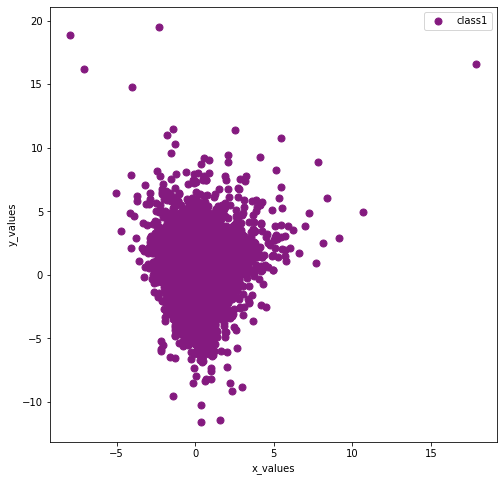

In [132]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[5,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[5], tocluster[1], 'o', markersize=7, color='#841a7f', alpha=1, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

# K-Means Clustering Algorithm

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=5,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ 1.26130176  0.50739931]
 [ 0.10384834 -2.48278601]
 [-0.45294341  1.18727846]
 [-0.13626783 -0.36093488]
 [ 0.18109446  3.95808979]]


In [54]:
print (c_preds[0:150])

[2 3 2 2 3 3 3 3 3 3 1 0 2 3 3 2 0 3 2 3 3 3 3 3 3 2 1 3 3 4 2 3 0 3 3 2 3
 3 3 3 2 3 3 3 3 3 3 2 3 3 3 2 3 3 3 2 3 3 3 1 3 3 3 2 3 0 3 1 3 3 3 3 2 0
 1 3 2 3 0 3 2 2 3 0 1 2 3 3 0 3 3 4 3 3 2 0 0 3 2 1 3 3 2 2 3 3 3 0 3 0 3
 3 0 4 0 3 3 3 2 0 3 0 3 0 3 0 3 2 1 3 3 0 2 3 2 3 3 2 3 2 4 1 1 2 0 2 3 2
 3 2]


['#e0731f', 'green', '#e0731f', '#e0731f', 'green', 'green', 'green', 'green', 'green', 'green']


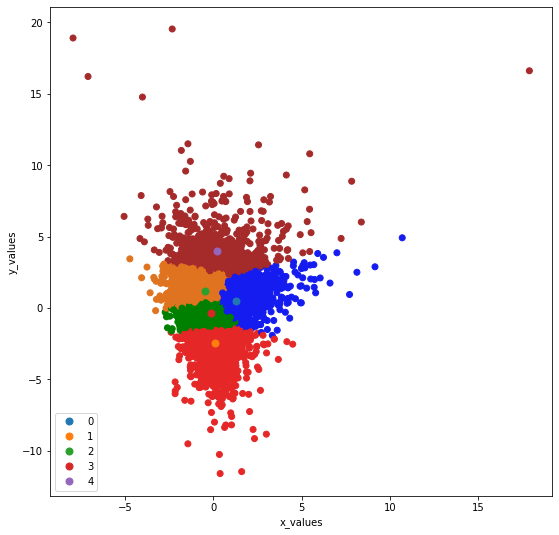

In [103]:
#Here is how our clusters appear
import matplotlib
fig = plt.figure(figsize=(9,9))
colors = ['#151cef','#e52727','#e0731f','green','brown']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[5],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=7,alpha=1, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()

In [56]:
#We have found a possible clustering for our customers. Let's check if we also manage to find some interesting pattern beneath it.
clust_prod = cust_prod.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
13,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,3
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,4,2
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,2
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3
42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
66,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3


(24169, 135)


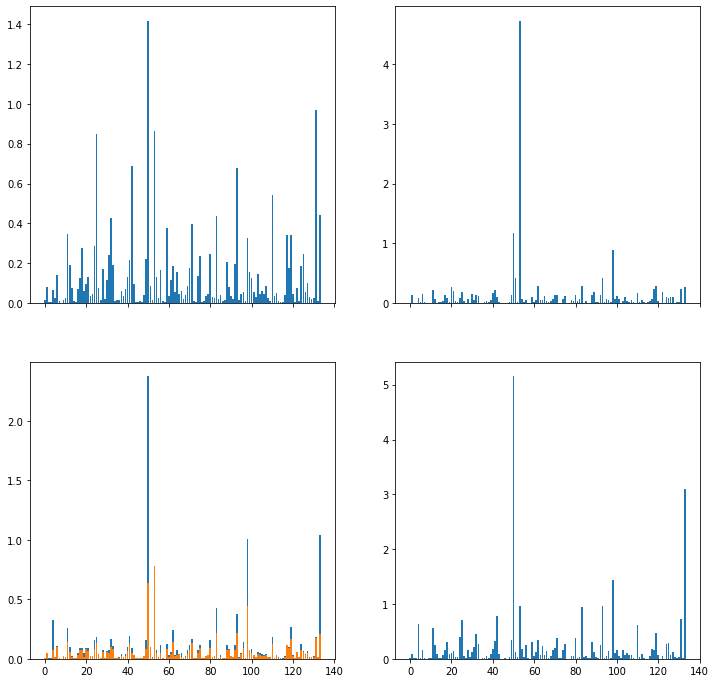

In [109]:
print (clust_prod.shape)
f,arr = plt.subplots(2,2,sharex=True,figsize=(12,12))

c1_count = len(clust_prod[clust_prod['cluster']==0])

c0 = clust_prod[clust_prod['cluster']==0].drop('cluster',axis=1).mean()
arr[0,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c0)
c1 = clust_prod[clust_prod['cluster']==1].drop('cluster',axis=1).mean()
arr[0,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c1)
c2 = clust_prod[clust_prod['cluster']==2].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c2)
c3 = clust_prod[clust_prod['cluster']==3].drop('cluster',axis=1).mean()
arr[1,0].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c3)
c4 = clust_prod[clust_prod['cluster']==4].drop('cluster',axis=1).mean()
arr[1,1].bar(range(len(clust_prod.drop('cluster',axis=1).columns)),c4)
plt.show()

In [58]:
#Let's check out what are the top 10 goods bought by people of each cluster. We are going to rely first on the absolute data and then on a percentage among the top 8 products for each cluster.
c0.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     1.418259
water seltzer sparkling water    0.967799
fresh vegetables                 0.862350
chips pretzels                   0.849965
energy granola bars              0.686837
packaged cheese                  0.679406
refrigerated                     0.541755
yogurt                           0.442321
milk                             0.434536
crackers                         0.425690
dtype: float64

In [59]:
c1.sort_values(ascending=False)[0:10]

aisle
fresh vegetables              4.731784
fresh fruits                  1.176447
packaged vegetables fruits    0.889327
fresh herbs                   0.425364
packaged cheese               0.418275
frozen produce                0.287515
soy lactosefree               0.286727
milk                          0.286333
yogurt                        0.267822
canned jarred vegetables      0.262702
dtype: float64

In [60]:
c2.sort_values(ascending=False)[0:10]

aisle
fresh fruits                  2.374166
yogurt                        1.043663
packaged vegetables fruits    1.011118
fresh vegetables              0.723267
milk                          0.426117
packaged cheese               0.380433
baby food formula             0.329695
soy lactosefree               0.265616
bread                         0.256317
frozen produce                0.240752
dtype: float64

In [61]:
c3.sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 0.782632
fresh fruits                     0.638803
packaged vegetables fruits       0.448113
milk                             0.219688
packaged cheese                  0.213656
yogurt                           0.206542
water seltzer sparkling water    0.173214
soy lactosefree                  0.168033
frozen produce                   0.141045
bread                            0.137566
dtype: float64

In [62]:
c4.sort_values(ascending=False)[0:10]

aisle
fresh fruits                     5.151351
yogurt                           3.099459
packaged vegetables fruits       1.445405
packaged cheese                  0.964324
fresh vegetables                 0.964324
milk                             0.944865
energy granola bars              0.781622
water seltzer sparkling water    0.722162
chips pretzels                   0.709189
baby food formula                0.628108
dtype: float64

In [63]:
from IPython.display import display, HTML
cluster_means = [[c0['fresh fruits'],c0['fresh vegetables'], c0['yogurt'], c0['packaged cheese'], c0['milk']],
                 [c1['fresh fruits'],c1['fresh vegetables'], c1['yogurt'], c1['packaged cheese'], c1['milk']],
                 [c2['fresh fruits'],c2['fresh vegetables'], c2['yogurt'], c2['packaged cheese'], c2['milk']],
                 [c3['fresh fruits'],c3['fresh vegetables'], c3['yogurt'], c3['packaged cheese'], c3['milk']],
                 [c4['fresh fruits'],c4['fresh vegetables'], c4['yogurt'], c4['packaged cheese'], c4['milk']]]
cluster_means = pd.DataFrame(cluster_means, columns = ['fresh fruits','fresh vegetables','yogurt','packaged cheese','milk'])
HTML(cluster_means.to_html())

,fresh fruits,fresh vegetables,yogurt,packaged cheese,milk
0,1.418259,0.862350,0.442321,0.679406,0.434536
1,1.176447,4.731784,0.267822,0.418275,0.286333
2,2.374166,0.723267,1.043663,0.380433,0.426117
3,0.638803,0.782632,0.206542,0.213656,0.219688
4,5.151351,0.964324,3.099459,0.964324,0.944865


In [64]:
cluster_perc = cluster_means.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
HTML(cluster_perc.to_html())

,fresh fruits,fresh vegetables,yogurt,packaged cheese,milk
0,36.963940,22.475330,11.528175,17.707277,11.325279
1,17.097882,68.769319,3.892387,6.078993,4.161420
2,47.985782,14.618402,21.094133,7.689165,8.612518
3,30.989984,37.967513,10.019882,10.365007,10.657613
4,46.307094,8.668610,27.862002,8.668610,8.493683


In [65]:
c0.sort_values(ascending=False)[10:15]

aisle
ice cream ice      0.397735
frozen meals       0.378273
bread              0.346780
soy lactosefree    0.343241
soft drinks        0.340057
dtype: float64

In [66]:
c1.sort_values(ascending=False)[10:15]

aisle
water seltzer sparkling water    0.240252
soup broth bouillon              0.228043
eggs                             0.224892
bread                            0.215833
canned meals beans               0.194565
dtype: float64

In [67]:
c2.sort_values(ascending=False)[10:15]

aisle
eggs                             0.191429
water seltzer sparkling water    0.186173
chips pretzels                   0.184961
refrigerated                     0.180109
crackers                         0.167778
dtype: float64

In [68]:
c3.sort_values(ascending=False)[10:15]

aisle
ice cream ice     0.132694
chips pretzels    0.130916
eggs              0.125735
refrigerated      0.121946
soft drinks       0.114522
dtype: float64

## DBSCAN Clustering

In [124]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 


In [125]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(cust_prod) 

# Normalizing the data so that 
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [126]:
# Numpy array of all the cluster labels assigned to each data point 
pca = PCA(n_components = 2) 
random = pca.fit_transform(cust_prod) 
random = pd.DataFrame(random) 
random.columns = ['P1', 'P2'] 
print(random.head()) 

         P1        P2
0 -0.289634  0.992705
1 -1.980425 -0.487090
2 -1.169478  1.314918
3 -1.434337  1.284597
4 -2.079287 -0.418771


In [127]:
db_default = DBSCAN(eps = 1, min_samples = 3).fit(random) 
labels = db_default.labels_ 

In [128]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[db_default.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)


In [129]:
print(metrics.silhouette_score(cust_prod,labels))

0.6495027947120656


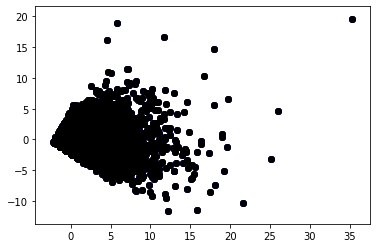

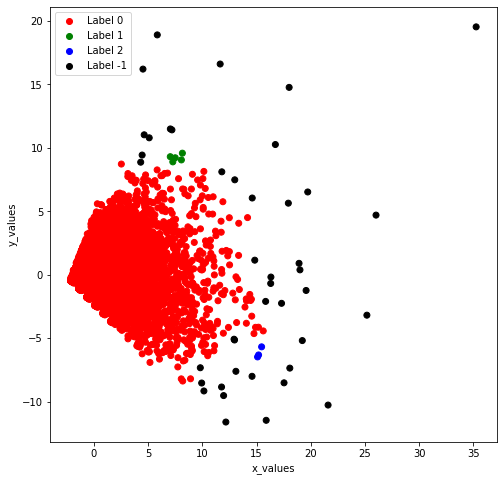

In [131]:
# Building the label to colour mapping 
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# For the construction of the legend of the plot 
r = plt.scatter(random['P1'], random['P2'], color ='r'); 
g = plt.scatter(random['P1'], random['P2'], color ='g'); 
b = plt.scatter(random['P1'], random['P2'], color ='b'); 
k = plt.scatter(random['P1'], random['P2'], color ='k'); 

# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined 
plt.figure(figsize =(8, 8)) 
plt.scatter(random['P1'], random['P2'], c = cvec) 
plt.xlabel('x_values')
plt.ylabel('y_values')
# Building the legend 
plt.legend((r,g,b,k), ('Label 0', 'Label 1', 'Label 2', 'Label -1')) 

plt.show() 

# Word to Vector in Product Analysis

In [76]:
import gensim
from sklearn.decomposition import PCA

In [77]:
train_orders = pd.read_csv('order_products__train.csv')
prior_orders = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv').set_index('product_id')

## Turn the product ID to a string

### This is necessary because Gensim's Word2Vec expects sentences

In [78]:
train_orders["product_id"] = train_orders["product_id"].astype(str)
prior_orders["product_id"] = prior_orders["product_id"].astype(str)

### Extract the ordered products in each order

In [79]:
train_products = train_orders.groupby("order_id").apply(lambda order: order['product_id'].tolist())
prior_products = prior_orders.groupby("order_id").apply(lambda order: order['product_id'].tolist())

### Create the final sentences

In [80]:
sentences = prior_products.append(train_products)
longest = np.max(sentences.apply(len))
sentences = sentences.values

## Train Word2Vec model

In [81]:
model = gensim.models.Word2Vec(sentences, size=1000, window=longest, min_count=2, workers=6)

### Organize data for visualization

In [82]:
vocab = list(model.wv.vocab.keys())

In [83]:
print("Number of words:", len(vocab))

Number of words: 49583


### PCA transform the vectors into 2d

In [84]:
pca = PCA(n_components=2)
pca.fit(model.wv.syn0)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

###  visualization

In [122]:
def get_batch(vocab, model, n_batches=3):
    output = list()
    for i in range(0, n_batches):
        rand_int = np.random.randint(len(vocab), size=1)[0]
        suggestions = model.most_similar(positive=[vocab[rand_int]], topn=4)
        suggest = list()
        for i in suggestions:
            suggest.append(i[0])
        output += suggest
        output.append(vocab[rand_int])
    return output

def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    """From Tensorflow's tutorial."""
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(7, 7))  #in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                     xy=(x, y),
                     xytext=(10, 10),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
#     plt.savefig(filename)
    plt.show()

### Visualize a random sample

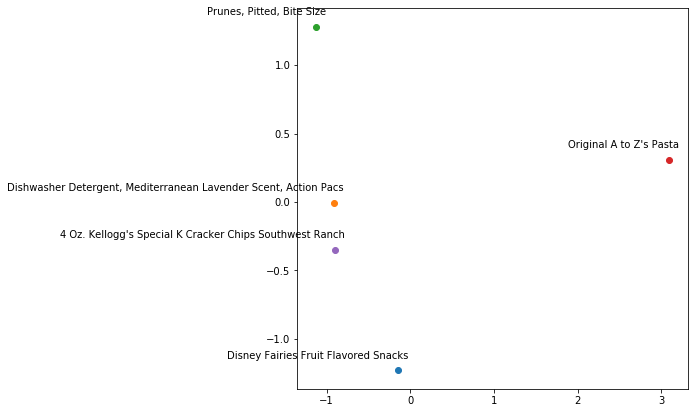

In [123]:
embeds = []
labels = []
for item in get_batch(vocab, model, n_batches=1):
    embeds.append(model[item])
    labels.append(products.loc[int(item)]['product_name'])
embeds = np.array(embeds)
embeds = pca.fit_transform(embeds)
plot_with_labels(embeds, labels)

### Save the model

In [87]:
model.save("product2vec.model")